In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
health_df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
health_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
health_df.columns
new_df = health_df.copy() # To generate new features

__EDA : Total Records and Null Counts__

In [4]:
print("Total Count: ", len(health_df))
print("Stroke Count: ", len(health_df[health_df['stroke']==1]))
print("No Stroke Count: ", len(health_df[health_df['stroke']==0]))

Total Count:  5110
Stroke Count:  249
No Stroke Count:  4861


In [5]:
print("Null count values across all columns:\n")
print(health_df.isna().sum())

Null count values across all columns:

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


__Mean__, __Median__, __Std-dev__ for each numerical column

In [6]:
numerical_cols = ['age','avg_glucose_level','bmi']
for col in numerical_cols:
    print("\n",col)
    print("Mean = ", health_df[col].mean())
    print("Median = ", health_df[col].std())
    print("Standard Deviation = ", health_df[col].median())


 age
Mean =  43.226614481409
Median =  22.61264672311349
Standard Deviation =  45.0

 avg_glucose_level
Mean =  106.1476771037182
Median =  45.28356015058198
Standard Deviation =  91.88499999999999

 bmi
Mean =  28.893236911794666
Median =  7.854066729680164
Standard Deviation =  28.1


__Charts for Analysis__

_Understanding the percentage of Strokes Distribution using Pie chart_

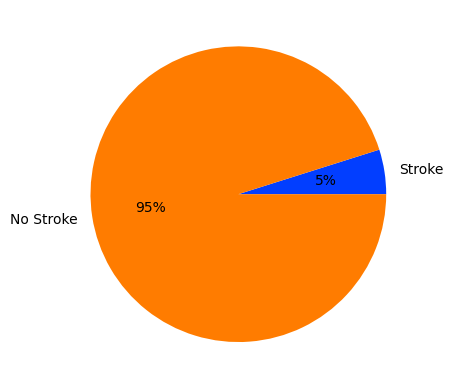

In [7]:
strokes_data = [len(health_df[health_df['stroke']==1]),len(health_df[health_df['stroke']==0])]
palette_color = sns.color_palette('bright')
plt.pie(strokes_data, labels=['Stroke','No Stroke'], colors=palette_color,autopct='%.0f%%')
plt.show()

_Clear imbalance in the dataset as out of  5110 people, __4861 didn’t get a stroke and only 249 did__. This will create a biased model so we need to create __sample___

_Using Bar Graph for some of other Categorical columns_

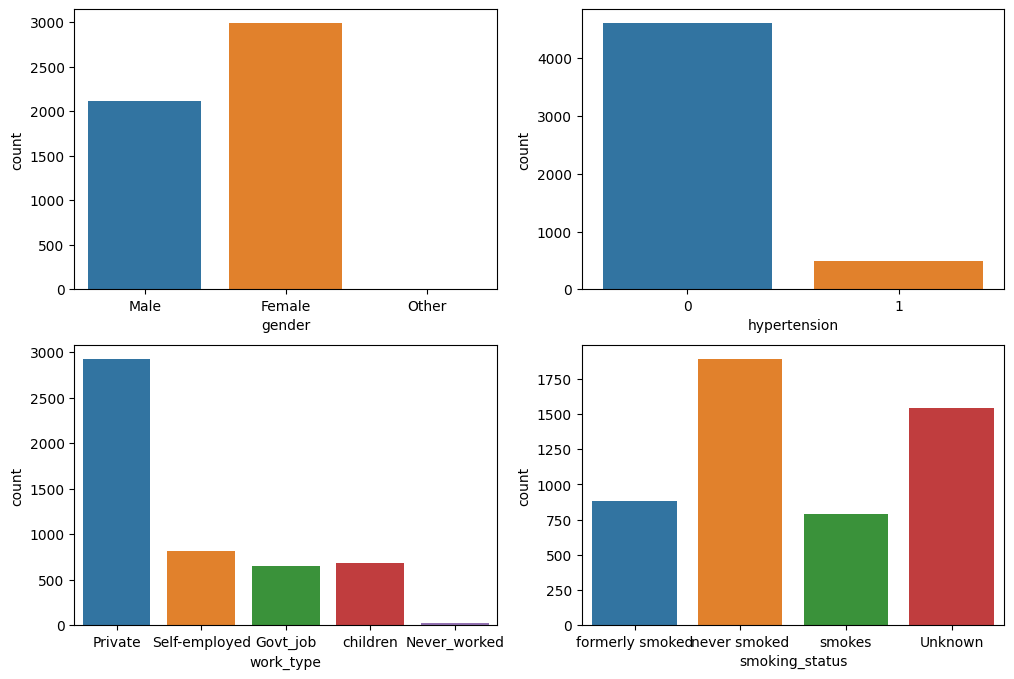

In [8]:
categorical_cols = ['gender', 'hypertension', 'work_type', 'smoking_status']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for var, subplot in zip(categorical_cols, axs.flatten()):
    sns.countplot(x=var, data=health_df, ax=subplot)

plt.show()


In [9]:
len(health_df[health_df['gender']=='Other'])

1

__GENDER__ :Distribution among Male and Female is almost similar with 1 as Other.  
__HYPERTENSION__ : Clear imbalance in if Hypertension present or not.  
__WORK TYPE__ : Most people work in private sector. Self-employed, Govt and Children are almost equally distributed with very handful being unemployed.  
__SMOKING STATUS__ : Most people have never smoked. The status of many is not known. And formerly smoked and currently smoked are almost similar.

__AGE Column using Histogram__  
_Sturge’s rule_ 

In [10]:
bin_count = int(np.ceil(np.log2(len(health_df))) + 1)
bin_count

14

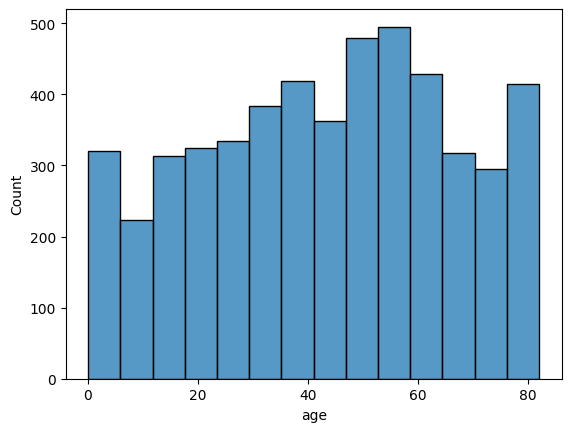

In [11]:
sns.histplot(health_df['age'],bins=bin_count)
plt.show()

All age groups are present, majority of people are old i.e within 45-60 years old

__BMI Column Analysis__

In [12]:
health_df['bmi'].isnull().sum()

201

In [13]:
print("Percentage of Null Values: ")
health_df['bmi'].isnull().sum()/len(health_df)*100

Percentage of Null Values: 


3.9334637964774952

In [14]:
health_df[health_df['bmi'].isnull()]['stroke'].sum()

40

_Filling missing values with __median___  
__Because__ :  The median is less sensitive to outliers compared to the mean and helps preserve the overall distribution of the data

In [15]:
health_df['bmi'] = health_df['bmi'].fillna(health_df['bmi'].median())

In [16]:
print("Null count values across all columns:\n")
print(health_df.isna().sum())

Null count values across all columns:

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


__Removing Outliers__  
_Plotting box plots_

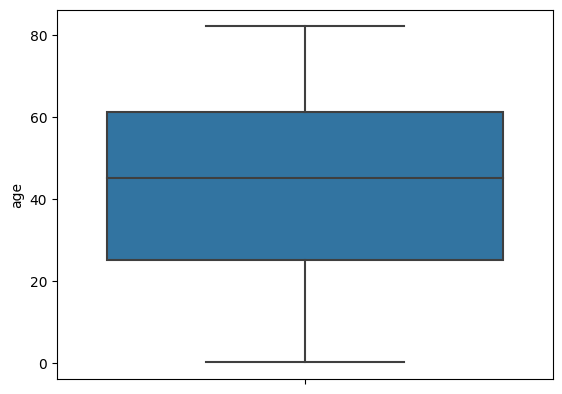

In [17]:
sns.boxplot(y = health_df['age'])
plt.show()

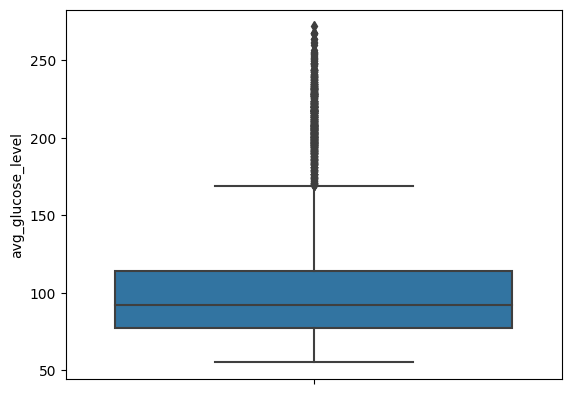

In [18]:
sns.boxplot(y = health_df['avg_glucose_level'])
plt.show()

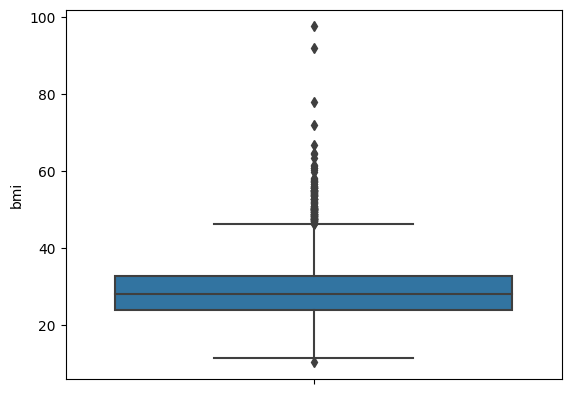

In [19]:
sns.boxplot(y = health_df['bmi'])
plt.show()

_We see no outliers in age, But there seem to be many in avg_glucose_lvl and bmi_

__Inter Quartile Range__

In [20]:
ub_lb = {}
def outliers():
    outlier_cols = ['avg_glucose_level','bmi']
    for col in outlier_cols:
        Q1 = np.percentile(health_df[col], 25, method='midpoint')
        Q3 = np.percentile(health_df[col], 75, method='midpoint')
        IQR = Q3 - Q1
        print("IQR of",col,IQR)

        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
        ub_lb[col] = [upper,lower]
        print("UpperBound - Lower Bound",col,ub_lb[col])
        print()

def outliers_count():
    outlier_cols = ['avg_glucose_level','bmi']
    for col in outlier_cols:
        x = ((health_df[col] > ub_lb[col][0] )| (health_df[col] < ub_lb[col][1] )).sum()
        print("Outliers in",col,x)

outliers()
outliers_count()
    

IQR of avg_glucose_level 36.84
UpperBound - Lower Bound avg_glucose_level [169.35000000000002, 21.989999999999995]

IQR of bmi 8.999999999999996
UpperBound - Lower Bound bmi [46.29999999999999, 10.300000000000006]

Outliers in avg_glucose_level 627
Outliers in bmi 126


_Removing outliers but setting them to Upper Bound and Lower Bound. Dropping row is not an option as __627__ is a huge number_

In [21]:
abc = health_df
def correct_outlier():
    outlier_cols = ['avg_glucose_level','bmi']
    for col in outlier_cols:
        abc[col] = np.where(health_df[col] < ub_lb[col][1], ub_lb[col][1], health_df[col])
        abc[col] = np.where(health_df[col] > ub_lb[col][0], ub_lb[col][0], abc[col])

correct_outlier()

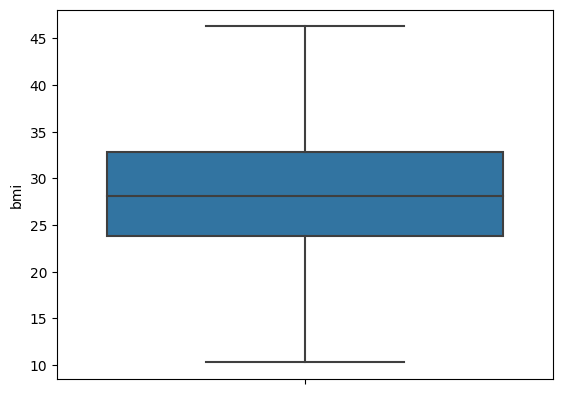

In [22]:
sns.boxplot(y = abc['bmi'])
plt.show()

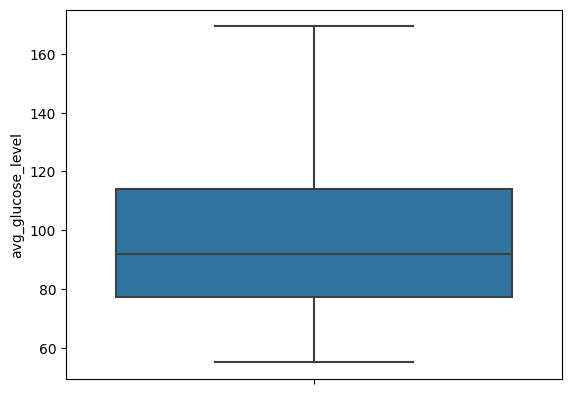

In [23]:
sns.boxplot(y = abc['avg_glucose_level'])
plt.show()

__Perform Scaling__  

__MinMaxScaler__ scales the data to a fixed range, typically between 0 and 1. On the other hand, __StandardScaler__ rescales the data to have a mean of 0 and a standard deviation    of 1. This results in a distribution with zero mean and unit variance.  

_Feature scaling is not important for algorithms such as random forest or decision trees which are scaling invariant. The scale of the value of the feature does not impact the model performance of models trained using these algorithms_

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = abc[['age','avg_glucose_level','bmi']]

X = pd.DataFrame(scaler.fit_transform(num_cols), columns = num_cols.columns)
abc['age'] = X['age']
abc['avg_glucose_level'] = X['avg_glucose_level']
abc['bmi'] = X['bmi']
abc.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,1.051434,0,1,Yes,Private,Urban,2.058282,1.110872,formerly smoked,1
1,51676,Female,0.786070,0,0,Yes,Self-employed,Rural,2.058282,-0.082921,never smoked,1
2,31112,Male,1.626390,0,1,Yes,Private,Rural,0.148292,0.535043,never smoked,1
3,60182,Female,0.255342,0,0,Yes,Private,Urban,2.058282,0.801890,smokes,1
4,1665,Female,1.582163,1,0,Yes,Self-employed,Rural,2.058282,-0.658751,never smoked,1


__Encoding Categorical Data__

In [27]:
abc.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,1.051434,0,1,Yes,Private,Urban,2.058282,1.110872,formerly smoked,1
1,51676,Female,0.786070,0,0,Yes,Self-employed,Rural,2.058282,-0.082921,never smoked,1
2,31112,Male,1.626390,0,1,Yes,Private,Rural,0.148292,0.535043,never smoked,1
3,60182,Female,0.255342,0,0,Yes,Private,Urban,2.058282,0.801890,smokes,1
4,1665,Female,1.582163,1,0,Yes,Self-employed,Rural,2.058282,-0.658751,never smoked,1


We need to encode gender, ever_married, work_type, Residence_type and smoking_status.

_Since only 1 is present in other for gender we remove that row_

In [28]:
abc = abc[abc['gender'] != 'Other']

In [29]:
abc['gender'] = abc['gender'].replace({'Male':1, 'Female':0})

C:\Users\balek\AppData\Local\Temp\ipykernel_19236\2127178948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc['gender'] = abc['gender'].replace({'Male':1, 'Female':0})


In [30]:
print(abc['ever_married'].unique())
print(abc['work_type'].unique())
print(abc['Residence_type'].unique())
print(abc['smoking_status'].unique())

['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [31]:
abc['ever_married'] = abc['ever_married'].replace({'Yes':1,'No':0})
abc['work_type'] = abc['work_type'].replace({'Never_worked':0,'Self-employed':1,'Govt_job':2,'Private':3, 'children':4})
abc['Residence_type'] = abc['Residence_type'].replace({'Urban':1, 'Rural':0})
abc['smoking_status'] = abc['smoking_status'].replace({'never smoked':0, 'Unknown':1, 'formerly smoked':2, 'smokes':3})
abc.head()

C:\Users\balek\AppData\Local\Temp\ipykernel_19236\3236430184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc['ever_married'] = abc['ever_married'].replace({'Yes':1,'No':0})
C:\Users\balek\AppData\Local\Temp\ipykernel_19236\3236430184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc['work_type'] = abc['work_type'].replace({'Never_worked':0,'Self-employed':1,'Govt_job':2,'Private':3, 'children':4})
C:\Users\balek\AppData\Local\Temp\ipykernel_19236\3236430184.py:3: SettingWithCopyWarning: 
A val

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,1.051434,0,1,1,3,1,2.058282,1.110872,2,1
1,51676,0,0.786070,0,0,1,1,0,2.058282,-0.082921,0,1
2,31112,1,1.626390,0,1,1,3,0,0.148292,0.535043,0,1
3,60182,0,0.255342,0,0,1,3,1,2.058282,0.801890,3,1
4,1665,0,1.582163,1,0,1,1,0,2.058282,-0.658751,0,1


__Generate new features__ -> Used original dataset for this

___Age__ is categorized into - 'Young' (0–18 years), 'Early adulthood' (19–45 years), 'Middle adulthood' (46–65 years), 'Later adulthood' (65+ years)   
This is done to capture the non-linear correlation between age and stroke risk, aiming to gain deeper insights into the specific patterns of stroke occurrence at different age groups._

In [32]:
new_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [33]:
def age_class(age):
    if age <= 18:
        return 'Young'
    elif 18 < age <= 45 :
        return 'Early adulthood'
    elif 45 < age <= 65 :
        return 'Middle adulthood'
    else:
        return 'Late adulthood'

new_df['age_class'] = new_df['age'].apply(age_class)
new_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Late adulthood
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Middle adulthood
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Late adulthood
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle adulthood
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Late adulthood


___Glucose Level__ is categorized into - 'Normal' ( < 140), ' Impaired Glucose Tolerance' (140-200 ), 'Provisional Diabetes' (200 > )_
This is according to a report by Science Direct

In [34]:
def glucose_class(gl_lvl):
    if gl_lvl <= 140:
        return 'Normal'
    elif 140 < gl_lvl <= 200 :
        return 'IGT'
    else:
        return 'Provisional Diabetes'

new_df['glucose_class'] = new_df['avg_glucose_level'].apply(glucose_class)
new_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_class,glucose_class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Late adulthood,Provisional Diabetes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Middle adulthood,Provisional Diabetes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Late adulthood,Normal
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle adulthood,IGT
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Late adulthood,IGT
